In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

import pandas as pd

In [7]:
from totalface_cpu.data.image import read_image
from totalface_cpu.model_zoo.get_models import get_detection_model
from totalface_cpu.face.get_result import get_detection

/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pkg_resources/_vendor/packaging/version.py:111: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  warnings.warn(


In [8]:
# detection
detection_name = "scrfd"
detection_path = "detection/scrfd_10g_bnkps.onnx"
# Set parameters
detection_thresh = 0.5
detection_height_min=0 
detection_model = get_detection_model(detection_name,detection_path,load_multi=False)

providers: ['CPUExecutionProvider']
scrfd onnx loaded


In [2]:
base = "celebA/Img/img_celeba/"

In [4]:
csv_path = "celebA/csv/230720/check_celebA.csv"
df = pd.read_csv(csv_path)

In [9]:
for val in df.values:
    img_path = os.path.join(base,val[0])
    break

In [73]:
img_path = os.path.join(base,df.values[2000][0])

In [74]:
img = read_image(img_path)
faces = get_detection(detection_name,detection_model,img,thresh=detection_thresh,height_min=detection_height_min,input_size=(640,640))

In [75]:
if len(faces)<1:
    print("not detect")
elif len(faces)>1:
    for face in faces:
        if face.max_flag:
            break
else:
    face = faces[0]

In [76]:
x1,y1,x2,y2 = face.bbox
w = (x2-x1)
h = (y2-y1)

In [77]:
x1,y1,x2,y2,w,h

(285.71692, 91.20485, 363.5952, 208.52652, 77.878296, 117.32167)

In [78]:
x_offset = int(w * 0.2)
y_offset = int(h * 0.125)

In [79]:
x_offset, y_offset

(15, 14)

In [80]:
x1 = int(max(0, x1 - x_offset))
y1 = int(max(0, (y1 - int(2 * y_offset))))
x2 = int(min(img.shape[1], x2 + x_offset))
y2 = int(min(img.shape[0], y2 + y_offset))

In [81]:
cropped = img[y1 : y2, x1 : x2]

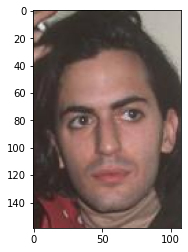

In [82]:
plt.imshow(cropped)